# Amazon Rekognition

Import packages

In [325]:
import boto3
import requests
import os
import matplotlib.pyplot as plt

In [194]:
BUCKETNAME = ''

Import files to S3

In [315]:
def downloadFile(file):
    file_name = file[file.rindex('/')+1:]
    print(file_name)
    r = requests.get(file, allow_redirects=True)
    open(file_name, 'wb').write(r.content)
    response = s3.upload_file(file_name, BUCKETNAME, "sports/"+file_name)
    os.remove(file_name)
    print("ok")

In [316]:
files = ["https://s3.amazonaws.com/immersiondays.lgbaeza/rekognition/basketball.jpg",
         "https://s3.amazonaws.com/immersiondays.lgbaeza/rekognition/football.jpg",
         "https://s3.amazonaws.com/immersiondays.lgbaeza/rekognition/soccer.jpg",
         "https://s3.amazonaws.com/immersiondays.lgbaeza/rekognition/swim.jpg",
         "https://s3.amazonaws.com/immersiondays.lgbaeza/rekognition/tennis.jpeg"]

In [317]:
for file in files:
    downloadFile(file)

basketball.jpg
ok
football.jpg
ok
soccer.jpg
ok
swim.jpg
ok
tennis.jpeg
ok


Rekognition client and logic to extract Sport label

In [318]:
rekognition = boto3.client('rekognition')

In [319]:
def getLabels(BUCKETNAME, FILENAME):
    response = rekognition.detect_labels(
        Image={
            'S3Object': {
                'Bucket': BUCKETNAME,
                'Name': FILENAME
            }
        }
    )
    d = []
    for label in response['Labels']:
        d.append({'file': FILENAME, 'label': label['Name'], 'confidence': label['Confidence']})
    labels = pd.DataFrame(d)
    return labels

List all files from S3 and extract sports

In [320]:
s3 = boto3.client('s3')

In [321]:
s3list = s3.list_objects(
    Bucket=BUCKETNAME,
    Prefix="sports/"
)

In [322]:
output = None
for file in s3list['Contents']:
    if('.jpg' in file['Key']):
        response = getLabels(BUCKETNAME, file['Key'])
        df = pd.DataFrame(response)
        output = pd.concat([output,df])

In [330]:
output.head(5)

,file,label,confidence
0,sports/basketball.jpg,Person,98.764290
1,sports/basketball.jpg,Human,98.764290
2,sports/basketball.jpg,People,98.151276
3,sports/basketball.jpg,Team Sport,92.855034
4,sports/basketball.jpg,Sport,92.855034


Present

In [353]:
output.groupby(['label']).mean()

,confidence
label,
American Football,97.362907
Apparel,90.112946
Audience,86.058563
Ball,82.515137
Baseball,72.922768
Baseball Glove,72.922768
Basketball,87.474403
Clothing,90.112946
Crash Helmet,68.956490


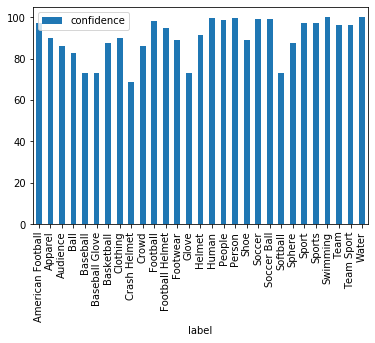

In [355]:
output.groupby(['label']).mean().plot.bar()